# **Random Forest - Classification**
#The Data
We will be using the same dataset through our discussions on classification with tree-methods (Decision Tree,Random Forests, and Gradient Boosted Trees) in order to compare performance metrics across these related models.

We will work with the "Palmer Penguins" dataset, as it is simple enough to help us fully understand how changing hyperparameters can change classification results.

**Our goal is to create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, instead of needing an experienced biologist**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/penguins_lter.csv')
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


#**EDA**

In [ ]:
df = df.drop(['studyName','Sample Number','Region','Stage','Individual ID','Clutch Completion','Date Egg','Delta 15 N (o/oo)','Delta 13 C (o/oo)','Comments'],axis = 1)

In [ ]:
df.isnull().sum()

,0
Species,0
Island,0
Culmen Length (mm),2
Culmen Depth (mm),2
Flipper Length (mm),2
Body Mass (g),2
Sex,10


# **Train | Test Split**

In [ ]:
x = pd.get_dummies(df.drop('Species',axis = 1),drop_first = True)
y = df['Species']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 101)


# **Random Forest Classification**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Use 10 random trees
rfc = RandomForestClassifier(n_estimators=10,max_features='sqrt',random_state=101)

In [ ]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [ ]:
y_pred = rfc.predict(x_test)
y_pred

array(['Adelie Penguin (Pygoscelis adeliae)',
       'Gentoo penguin (Pygoscelis papua)',
       'Adelie Penguin (Pygoscelis adeliae)',
       'Adelie Penguin (Pygoscelis adeliae)',
       'Gentoo penguin (Pygoscelis papua)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Gentoo penguin (Pygoscelis papua)',
       'Gentoo penguin (Pygoscelis papua)',
       'Adelie Penguin (Pygoscelis adeliae)',
       'Adelie Penguin (Pygoscelis adeliae)',
       'Gentoo penguin (Pygoscelis papua)',
       'Adelie Penguin (Pygoscelis adeliae)',
       'Adelie Penguin (Pygoscelis adeliae)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Adelie Penguin (Pygoscelis adeliae)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Chinstrap penguin (Pygoscelis antarctica

# **Evaluation**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[41  0  0]
 [ 0 26  0]
 [ 0  0 37]]


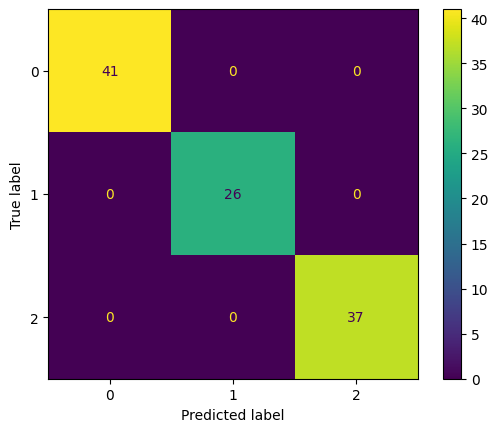

In [ ]:
cm = confusion_matrix(y_test,y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()

# **Feature Importance**

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
  if df[col].dtype == 'object':
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Species'),
  Text(1, 0, 'Island'),
  Text(2, 0, 'Culmen Length (mm)'),
  Text(3, 0, 'Culmen Depth (mm)'),
  Text(4, 0, 'Flipper Length (mm)'),
  Text(5, 0, 'Body Mass (g)'),
  Text(6, 0, 'Sex')])

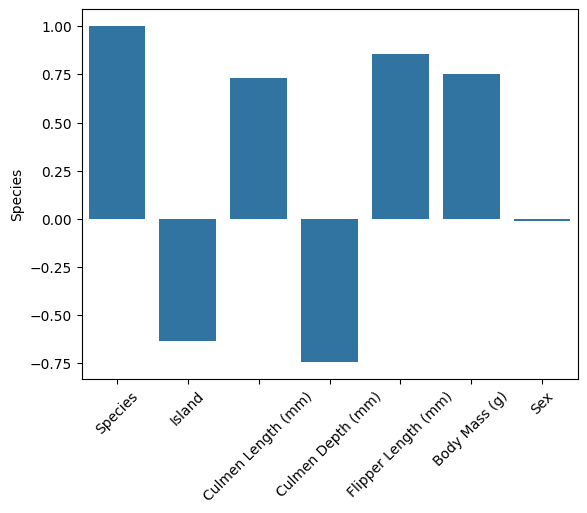

In [ ]:
sns.barplot(df.corr()['Species'])
plt.xticks(rotation = 45)

# **Choosing correct number of trees**

let's explore if continually adding more trees improves performance...

In [ ]:
test_error = []
for n in range (1,40):
  rfc = RandomForestClassifier(n_estimators=n,max_features='sqrt',random_state=101)
  rfc.fit(x_train,y_train)
  y_pred = rfc.predict(x_test)
  test_error.append(accuracy_score(y_test,y_pred))

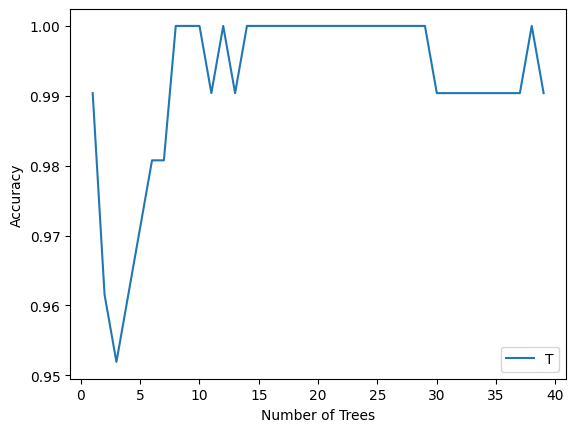

In [ ]:
plt.plot(range(1,40),test_error)
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend('Test Error',loc='lower right')


Let's try it on large Dataset

# **Random Forest - HyperParameter Exploration**

In [ ]:
df = pd.read_csv('/content/data_banknote_authentication.csv')
df.head()

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [ ]:
df.shape

(1371, 5)

In [ ]:
feature_names = ['Variance_Wavelet', 'Skewness_Wavelet', 'Curtosis_Wavelet','Image_Entropy','Class']
df.columns = feature_names

In [ ]:
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


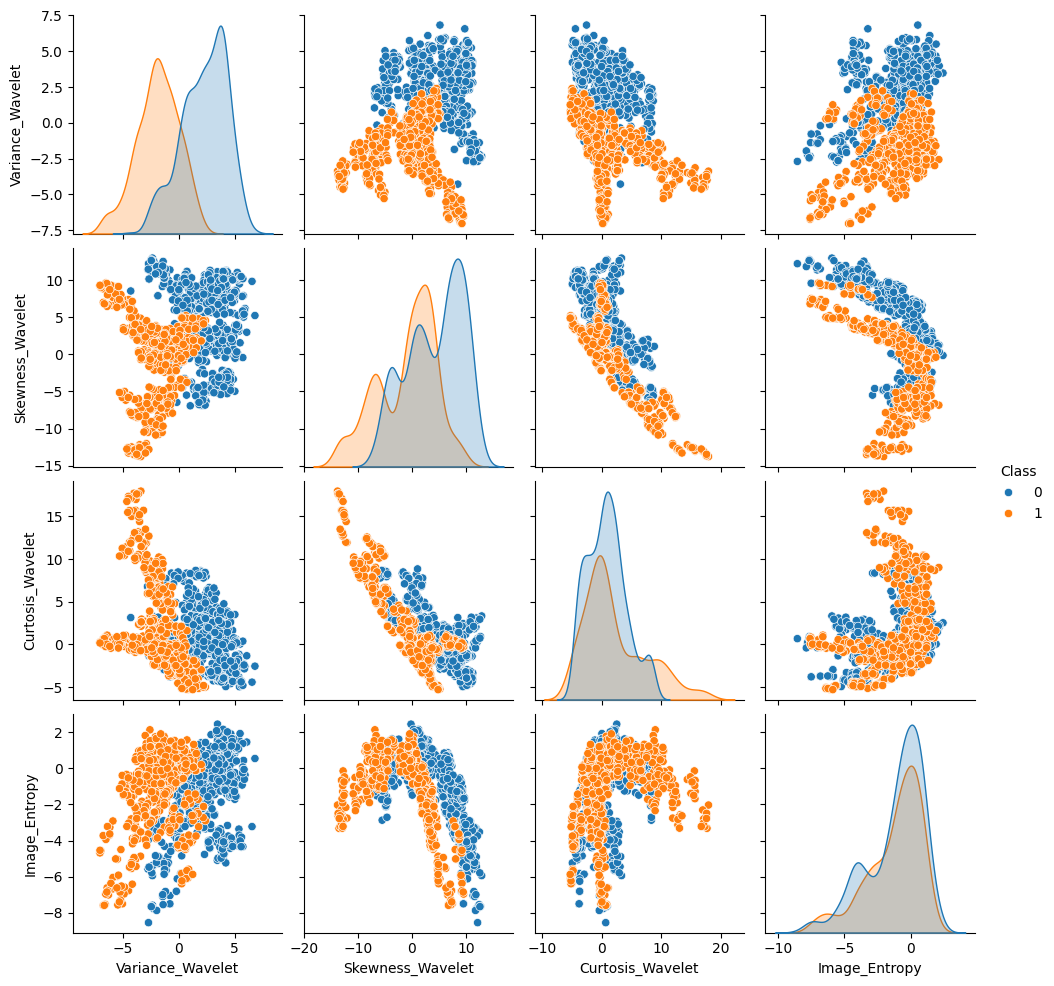

In [ ]:
sns.pairplot(df,hue = 'Class')

#**Train_Test_Split**

In [ ]:
from sklearn.model_selection import train_test_split
x = df.drop('Class',axis = 1)
y = df['Class']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.15,random_state = 101)

**GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

In [ ]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}  # Note, oob_score only makes sense when bootstrap=True!

In [54]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [55]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 100, 'oob_score': False}

In [56]:
grid.best_estimator_

RandomForestClassifier(max_features=2)

In [57]:
grid.best_score_

np.float64(0.9931330472103005)

In [58]:
grid.best_index_

np.int64(3)

In [59]:
grid_pred = grid.predict(x_test)

#**Evaluation**

In [61]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00        93

    accuracy                           1.00       206
   macro avg       1.00      1.00      1.00       206
weighted avg       1.00      1.00      1.00       206



In [62]:
print(confusion_matrix(y_test,grid_pred))

[[113   0]
 [  0  93]]


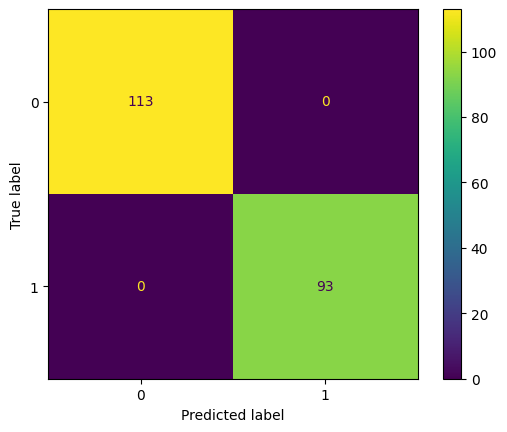

In [63]:
cm = confusion_matrix(y_test,grid_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()

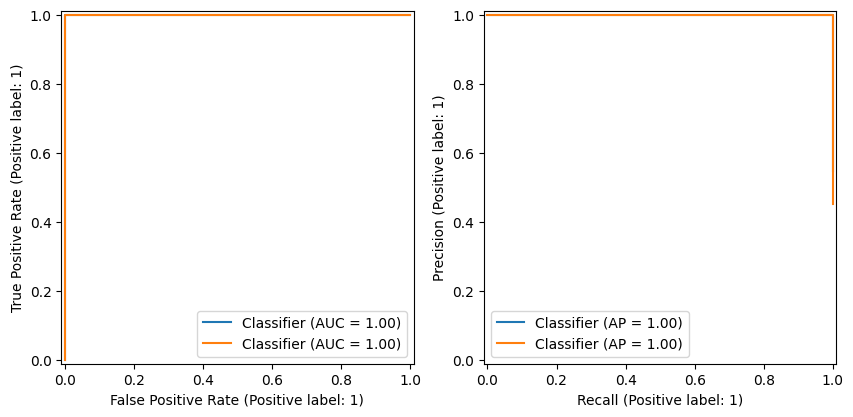

In [65]:
# Roc and Precision recall
from sklearn.metrics import RocCurveDisplay,PrecisionRecallDisplay
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (10,5))
for i, class_id in enumerate(grid.classes_):
  y_test_binary = (y_test == class_id).astype(int)
  y_score_current_class = grid.predict_proba(x_test)[:,i]
  RocCurveDisplay.from_predictions(y_test_binary,y_score_current_class,ax = ax1)
  PrecisionRecallDisplay.from_predictions(y_test_binary,y_score_current_class,ax = ax2)
ax1.set_aspect('equal') # controls the aspect ratio of the plot. The aspect ratio is the ratio of the plot's height to its width.
ax2.set_aspect('equal')

# **Understanding Number of Estimators (Trees)**

Let's plot out error vs. Number of Estimators

In [66]:
from sklearn.metrics import accuracy_score

In [69]:
errors = []
misclassifications = []

for n in range(1,64):
  rfc = RandomForestClassifier(n_estimators=n,max_features='sqrt',random_state=101)
  rfc.fit(x_train,y_train)
  y_pred = rfc.predict(x_test)
  errors.append(1 - accuracy_score(y_pred,y_test))
  misclassifications.append(np.sum((y_test != y_pred)))

In [70]:
print(errors)

[0.014563106796116498, 0.009708737864077666, 0.004854368932038833, 0.009708737864077666, 0.004854368932038833, 0.009708737864077666, 0.004854368932038833, 0.004854368932038833, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [76]:
len(misclassifications)

63

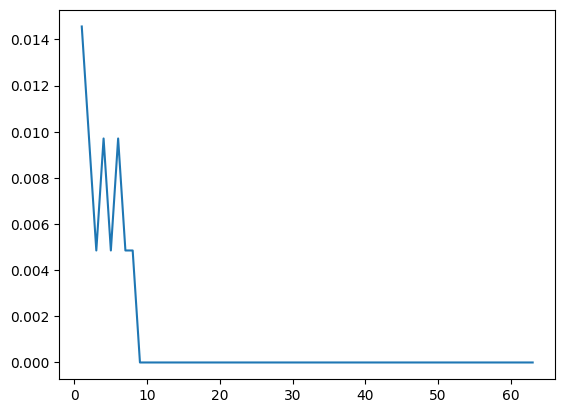

In [77]:
plt.plot(range(1,64),errors)

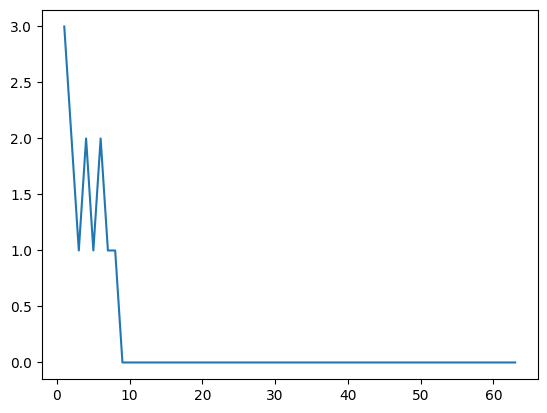

In [78]:
plt.plot(range(1,64),misclassifications)